In [10]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
train = pd.read_csv(r'C:\Users\Shan\Documents\GitHub\ML-in-python\Kaggle titanic competitions/train.csv')
test_df = pd.read_csv(r'C:\Users\Shan\Documents\GitHub\ML-in-python\Kaggle titanic competitions/test.csv')
labels = train.Survived

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### So there are three columns with missing value that is Age, Cabin and Embarked. Among them Cabin has very less values so I might reject it all together. 

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data-Visualisation

In [62]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

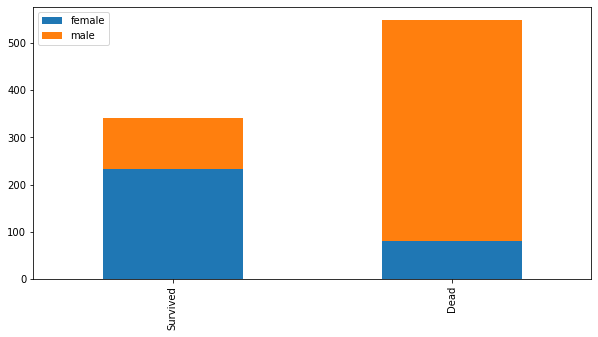

In [63]:
bar_chart('Sex')

####  Here, blue represents the women and orrange represents the dead clearly womens have survived more than men un the crash

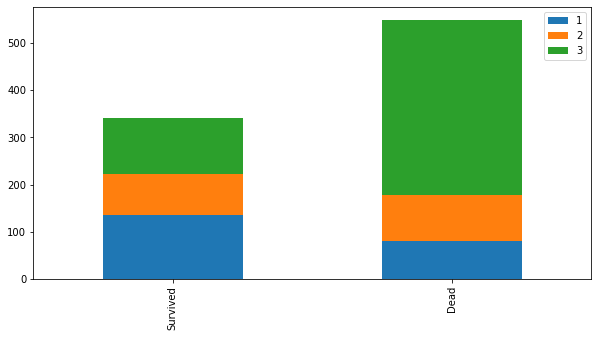

In [64]:
bar_chart('Pclass')

#### Here 3rd class - green, 2nd class - orange, 1st class - blue, clearly the 1st class people survived more than the 3rd class

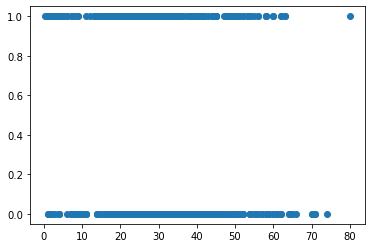

In [65]:
plt.scatter(train.Age, train.Survived)

#### Not much information from the data apart from the fact that people between the age 63 - 80 have all died

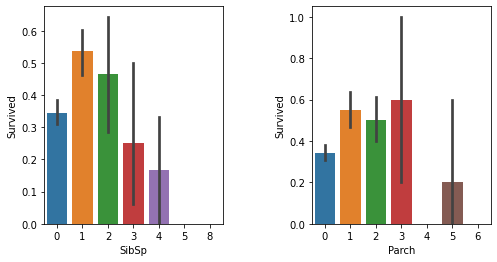

In [66]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.barplot(train.SibSp, train.Survived)
plt.subplot(122)
sns.barplot(train.Parch, train.Survived)
plt.subplots_adjust(wspace=0.5)
plt.show()

#### From here it is clear that people who were alone or with more than one company have all died

### So after the exploration I have selected 5 features which are Pclass, Age, Gender, fare, SibSp(sibling or spouse ) and Parch ( parent or children ) 

## Data cleaning and processing

In [5]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: return 24
    else: return Age

In [13]:
train['Age']=train[['Age','Pclass']].apply(inpute_age, axis=1)

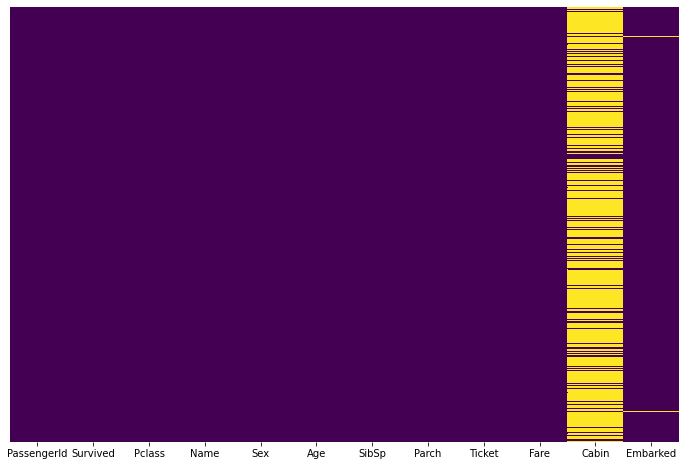

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cbar=False, yticklabels=False, cmap='viridis')

#### So I have cleaned the Age column and I would reject the Cabin column completely, left is embarked. 

In [16]:
train.drop('Cabin', axis=1, inplace=True)

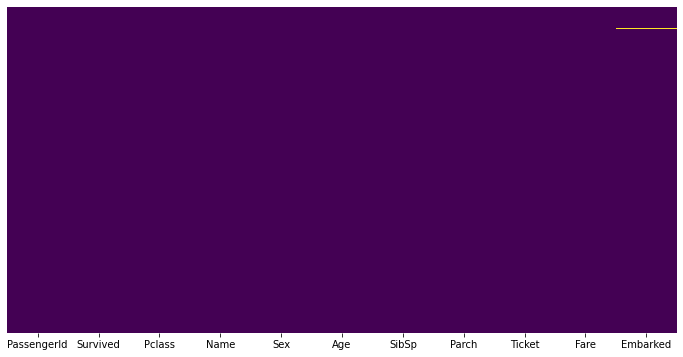

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [21]:
train.dropna(inplace=True)

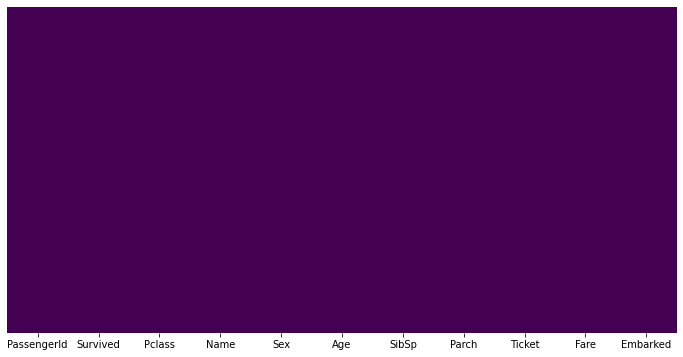

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),cbar=False, yticklabels=False, cmap='viridis')

#### The data is now completely cleaned

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [27]:

train['Male'] = pd.get_dummies(train['Sex'], drop_first=True)

In [30]:

embarked = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, embarked], axis=1)

In [32]:
train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Q,S,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
 9   Q         889 non-null    uint8  
 10  S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.0 KB


In [40]:
train.drop(['Q','S'], axis=1, inplace=True)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Male      889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 49.5 KB


In [44]:
#Seperate the feature columns from the target column
X = train.drop('Survived', axis=1)
y = train['Survived']

In [45]:
#Split the data into two. I don't think this is necessary since there are two files.
#I will keep this here for now
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [46]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X, y)

LogisticRegression()

In [53]:
#Clean the test data the same way we did the training data
test_df['Age']=test_df[['Age','Pclass']].apply(inpute_age, axis=1)
test_df.drop('Cabin', axis=1, inplace=True)
test_df.dropna(inplace=True)
test_df['Male'] = pd.get_dummies(test_df['Sex'], drop_first=True)
embarked = pd.get_dummies(test_df['Embarked'], drop_first=True)
test_df = pd.concat([test_df, embarked], axis=1)
pass_ids = test_df['PassengerId']
test_df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Age     417 non-null    float64
 2   SibSp   417 non-null    int64  
 3   Parch   417 non-null    int64  
 4   Fare    417 non-null    float64
 5   Male    417 non-null    uint8  
 6   Q       417 non-null    uint8  
 7   S       417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


In [56]:
test_df.drop(['Q','S'], axis=1, inplace=True)

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Age     417 non-null    float64
 2   SibSp   417 non-null    int64  
 3   Parch   417 non-null    int64  
 4   Fare    417 non-null    float64
 5   Male    417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 20.0 KB


In [58]:
predictions = logmodel.predict(test_df)

In [59]:
submission = pd.DataFrame({
        "PassengerId": pass_ids,
        "Survived": predictions
    })
submission.to_csv('titanic.csv', index=False)

Reference taken from - https://github.com/minsuk-heo/kaggle- 